In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
from constantmanager import EVENTS_TYPE, ADITIONAL_TYPES, DATETIME, EVENTS_TYPE, LATITUDE, LONGITUDE, ADITIONAL_TYPES, FREQUENCY

In [3]:
#DATA LOAD
xls = pd.ExcelFile('../../TM proyect/TM cases and logs.xlsx')
calls = pd.read_excel(xls, 'WorkLog')
events = pd.read_excel(xls, 'CaseLog')

In [4]:
from descriptions.utils_description import create_Subdata

In [5]:
create_Subdata(events,[EVENTS_TYPE])

,CaseTypeName,Frequency
0,Assistans,1505
2,Skadeärende,1036
1,Påringningsärende,333
3,Transport,35


In [6]:
create_Subdata(events,[EVENTS_TYPE,DATETIME])

,CaseTypeName,StartTime,Frequency
2790,Skadeärende,2021-09-17 12:58:00.0000000,3
2483,Skadeärende,2021-05-19 13:01:00.0000000,2
2743,Skadeärende,2021-08-18 10:46:00.0000000,2
542,Assistans,2020-07-22 11:11:00.0000000,2
960,Assistans,2021-06-14 09:23:00.0000000,2
...,...,...,...
971,Assistans,2021-06-17 18:23:00.0000000,1
972,Assistans,2021-06-18 13:55:00.0000000,1
973,Assistans,2021-06-18 14:34:00.0000000,1
974,Assistans,2021-06-18 20:26:00.0000000,1


In [7]:
from descriptions.utils_description import bar_figure_top_values

In [8]:
bar_figure_top_values(create_Subdata(events,EVENTS_TYPE),EVENTS_TYPE)

In [9]:
from descriptions.utils_description import line_figure

In [10]:
line_figure(create_Subdata(events,ADITIONAL_TYPES[0]),ADITIONAL_TYPES[0],1,1)

In [11]:
from descriptions.utils_description import bar_figure_probabilities

In [12]:
bar_figure_probabilities(create_Subdata(events,EVENTS_TYPE),EVENTS_TYPE)

In [13]:
from descriptions.utils_description import bubbles_figure_probabilities

In [14]:
bubbles_figure_probabilities(create_Subdata(events,[EVENTS_TYPE,ADITIONAL_TYPES[0]]),EVENTS_TYPE,ADITIONAL_TYPES[0])

In [15]:
from descriptions.utils_description import get_probabilities_matrices

In [16]:
M=get_probabilities_matrices(create_Subdata(events,[EVENTS_TYPE,ADITIONAL_TYPES[0]]),EVENTS_TYPE,ADITIONAL_TYPES[0])

In [17]:
M[0]

ShipType,Motorbåt,Segelbåt,Vattenskoter,Annat,Båttrailer
CaseTypeName,,,,,
Assistans,0.415552,0.108374,0.000704,0.000704,0.000352
Skadeärende,0.288881,0.063688,0.003519,0.002815,0.000000
Påringningsärende,0.089374,0.022519,0.001759,0.000352,0.000704
Transport,0.000352,0.000000,0.000000,0.000352,0.000000


In [18]:
M[1]

ShipType,Motorbåt,Segelbåt,Vattenskoter,Annat,Båttrailer
CaseTypeName,,,,,
Assistans,0.523261,0.556962,0.117647,0.166667,0.333333
Skadeärende,0.363757,0.327306,0.588235,0.666667,0.000000
Påringningsärende,0.112539,0.115732,0.294118,0.083333,0.666667
Transport,0.000443,0.000000,0.000000,0.083333,0.000000


In [19]:
M[2]

ShipType,Motorbåt,Segelbåt,Vattenskoter,Annat,Båttrailer
CaseTypeName,,,,,
Assistans,0.790495,0.206158,0.001339,0.001339,0.000669
Skadeärende,0.804902,0.177451,0.009804,0.007843,0.000000
Påringningsärende,0.779141,0.196319,0.015337,0.003067,0.006135
Transport,0.500000,0.000000,0.000000,0.500000,0.000000


In [20]:
from descriptions.utils_description import heatmap_figure_probabilities

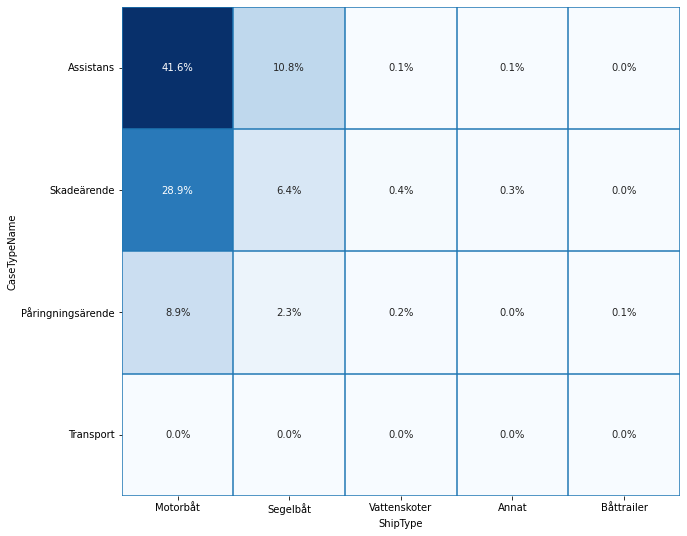

In [21]:
heatmap_figure_probabilities(M[0])

In [22]:
from descriptions.utils_description import heatmap_geo

In [23]:
heatmap_geo(events)

In [24]:
from descriptions.utils_description import verify_inside_poly,verify_inside_for_perm, get_name_poly,refill_geo

In [25]:
# JSON DATA
import geopandas as gpd
from constantmanager import NAME_POLYGON
Json_data=gpd.read_file('../../TM proyect/sweden-counties.geojson')

In [26]:
Json_data.head(3)

,name,cartodb_id,created_at,updated_at,geometry
0,Stockholm,1,2014-09-16T07:35:21+00:00,2014-09-16T07:35:21+00:00,"MULTIPOLYGON (((18.22066 58.91485, 18.19383 58..."
1,Västmanland,15,2014-09-16T07:35:21+00:00,2014-09-16T07:35:21+00:00,"MULTIPOLYGON (((15.53465 59.70831, 15.48160 59..."
2,Värmland,13,2014-09-16T07:35:21+00:00,2014-09-16T07:35:21+00:00,"MULTIPOLYGON (((13.10028 59.25040, 13.16590 59..."


In [27]:
verify_inside_poly(Json_data.geometry.values[0],events[[LONGITUDE,LATITUDE]].values[0])

True

In [28]:
verify_inside_for_perm(Json_data.geometry.values[0],events[[LONGITUDE,LATITUDE]].values[0])

array([17.706564, 59.265804])

In [29]:
get_name_poly(Json_data,"name",events[[LONGITUDE,LATITUDE]].values[0])

'Stockholm'

In [30]:
real_polys=refill_geo(events[[LONGITUDE,LATITUDE]].values,Json_data,"name")
real_polys

array([['Stockholm', 17.706564, 59.265804],
       [None, 0, 0],
       ['Värmland', 13.091052, 59.332669],
       ...,
       [None, 0, 0],
       [None, 0, 0],
       [None, 0, 0]], dtype=object)

In [31]:
import numpy as np
from descriptions.utils_description import map_polygons,merge_geoNdata

In [32]:
events[['poly_name',LONGITUDE,LATITUDE]] = real_polys

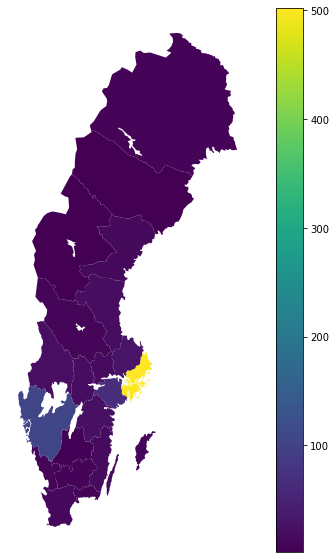

In [33]:
map_polygons(merge_geoNdata(Json_data,"name",create_Subdata(events,["poly_name"]),"poly_name"),FREQUENCY)

In [34]:
from descriptions.utils_description import map_polygons_html

In [35]:
map_polygons_html(merge_geoNdata(Json_data,"name",create_Subdata(events,["poly_name"]),"poly_name"),"poly_name",FREQUENCY)

/home/combios/Desktop/TM/general_proyect/examples/../descriptions/utils_description.py:569: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/home/combios/Desktop/TM/general_proyect/examples/../descriptions/utils_description.py:570: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


